In [282]:
%matplotlib inline
import matplotlib.pyplot as plt
#from jax import grad, jit, random
#import jax.numpy as np
import numpy as np
import torch
from torch.autograd import grad

$$
\mathbb{E}_{p(b|\theta)} \left[ (b - .45)^2 \right]
$$

In [283]:
def logprob(b, theta):
    return (b - theta)**2
    #return b*torch.log(theta) + (1 - b)*torch.log(1 - theta)

In [284]:
torch.bernoulli(torch.tensor(0.5))

tensor(0.)

In [285]:
def magic_box(x):
    return torch.exp(x - x.detach())


def objective_reinforce(fun, logprob):
    def f(theta, b):
        #b = torch.bernoulli(theta)
        #bb = magic_box(b)
        return fun(b) * magic_box(logprob(b, theta))
    return f


def fun(b):
    return (b - .45)**2

In [296]:
theta0 = torch.tensor(0.45, requires_grad=True)
eta = torch.tensor(0.005, requires_grad=True)

def reinforce(theta0, eta):
    """One step of reinforce gradient estimator
    """
    theta_p = theta0
    for i in range(2):
        bs = 0.1 * torch.randn(1) + theta_p
        #bs = torch.bernoulli(theta_p)
        theta_p = theta_p - eta*grad(objective_reinforce(fun, logprob)(theta_p, bs), theta_p, create_graph=True)[0]
    loss = fun( 0.1 * torch.randn(1) + theta_p).mean()
    #loss = fun( torch.bernoulli(theta_p) ).mean()
    #losses.append(loss)   
    return loss

In [297]:
reinforce(theta0, eta)

tensor(0.0004, grad_fn=<MeanBackward0>)

In [298]:
grad(reinforce(theta0, eta), theta0)[0]

tensor(-0.3330)

In [299]:
theta0 = torch.tensor(.25, requires_grad=True)
eta = torch.tensor(0.1, requires_grad=True)


thetas = []

for _ in range(1000):

    eta = eta - 0.01*grad(reinforce(theta0, eta), eta)[0]
    thetas.append(eta)
    #print(grad(reinforce(theta0, eta), theta0)[0])


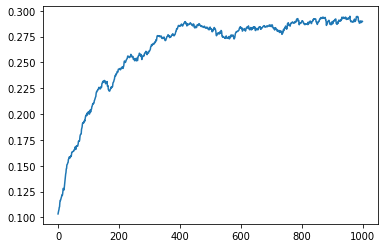

In [300]:


plt.plot(thetas)

## Simple higher order autodiff example

In [170]:
def loss(x):
    return torch.sum(x**2)

def sgd(x0, eta):
    return loss(x0 - eta*grad(loss(x0), x0)[0])

In [171]:
loss(torch.tensor(0.2))

tensor(0.0400)

In [172]:
sgd(torch.tensor(0.2, requires_grad=True), eta=0.01)

tensor(0.0384, grad_fn=<SumBackward0>)

In [173]:
x0 = torch.tensor(0.2, requires_grad=True)
eta = torch.tensor(0.01, requires_grad=True)

grad(sgd(x0, eta), eta)

(tensor(-0.1568),)

In [174]:
grad(sgd(x0, eta), x0)

(tensor(0.3920),)